## Import libraries

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from dask.distributed import Client
import sys
sys.path.append('src')
from calculate_anomalies import calculate_anomalies

### Set up local dask cluster

In [3]:
client = Client(n_workers=6, threads_per_worker=1, memory_limit='4GB')
client

Client Scheduler: tcp://127.0.0.1:34670 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 6 Cores: 6 Memory: 24.00 GB


## User Inputs

In [4]:
# from_shapefile = False
shp_fpath = "path/to/shape.shp"
lat, lon = -34.347671, 143.832157
buffer = 0.1
year = '2010'
season = 'DJF'

chunk_size = 500

## Calculate the anomaly for the AOI

In [6]:
anomalies = calculate_anomalies(lat=lat,
                        lon=lon,
                        buffer=buffer,
                        year=year,
                        season=season,
                        chunk_size=chunk_size)


Loading ls5
 Applying pixel quality mask
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Skipping ls8; no valid data for query
Returning ls5 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


In [8]:
# Compute the anomalies
anomalies = anomalies.compute()

## Plot the result

Text(0.5, 1.0, 'DJF 2010')

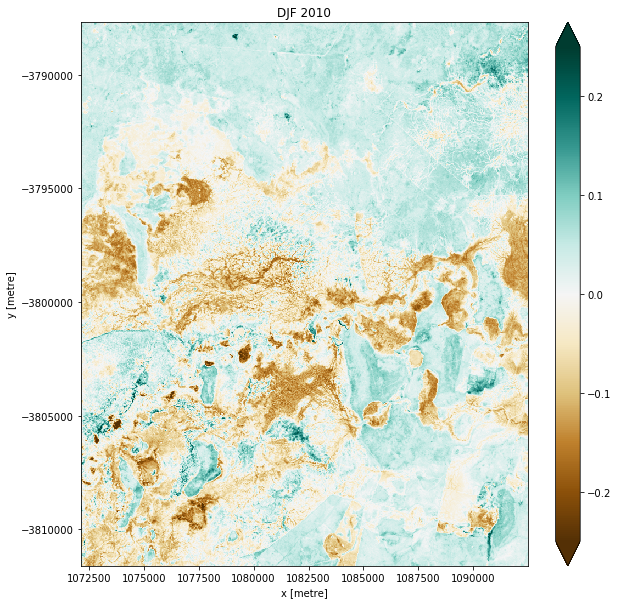

In [9]:
anomalies.plot(figsize=(10,10), vmin=-0.25, vmax=0.25, cmap='BrBG')
plt.title(season+ " " +year)